## 0. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
%matplotlib inline
#import plotly
#import plotly.graph_objs as go
#plotly.offline.init_notebook_mode() # run at the start of every notebook
#import plotly.plotly as py
#py.sign_in('lemoga.inv', '5mjpk13cyv')

In [2]:
taxonomy = pd.read_csv("taxonomyAnotation.csv")
taxonomy.head()

,Accession,Species,Genus,Subfamily,Family,Order,type,NN
0,FJ794068,WU Polyomavirus,Polyomavirus,NaN,Polyomaviridae,NaN,dsDNA viruses,no RNA stage
1,GU048663,Human bocavirus 2,Bocaparvovirus,Parvovirinae,Parvoviridae,NaN,ssDNA viruses,NaN
2,NC_003747,Ryegrass mottle virus,Sobemovirus,NaN,NaN,NaN,ssRNA viruses,NaN
3,NC_011500,Rotavirus A,Rotavirus,Sedoreovirinae,Reoviridae,NaN,dsRNA viruses,NaN
4,JN226758,Human mastadenovirus D,Mastadenovirus,NaN,Adenoviridae,NaN,dsDNA viruses,no RNA stage


In [10]:
taxonomy[taxonomy["Family"]=="Rhabdoviridae"]["Genus"].unique()

array(['Tibrovirus', nan, 'Lyssavirus', 'Cytorhabdovirus', 'Ephemerovirus',
       'Sprivivirus', 'Nucleorhabdovirus', 'Novirhabdovirus',
       'Vesiculovirus', 'Perhabdovirus', 'Tupavirus', 'Sigmavirus',
       'Bracorhabdovirus'], dtype=object)

In [3]:
#How many accessions include the taxonomy table?
taxonomy.shape

(13999, 8)

In [4]:
#Which types of viruses are included?
taxonomy["type"].unique()

array(['dsDNA viruses', 'ssDNA viruses', 'ssRNA viruses', 'dsRNA viruses',
       'Retro-transcribing viruses', 'environmental samples', 'Satellites',
       'unclassified phages', 'unclassified viruses',
       'unclassified archaeal viruses', 'unclassified virophages'], dtype=object)

In [5]:
#How many viruses did not have a taxonomic annotation?
taxonomy[taxonomy["type"].isin(['environmental samples', 'Satellites',
       'unclassified phages', 'unclassified viruses',
       'unclassified archaeal viruses', 'unclassified virophages'])].shape

(1122, 8)

In [6]:
#How many viruses per category did not have a taxonomic annotation?
annotation = ['environmental samples', 'Satellites',
       'unclassified phages', 'unclassified viruses',
       'unclassified archaeal viruses', 'unclassified virophages']
for a in annotation:
    print a+":", taxonomy[taxonomy["type"]==a].shape[0]

environmental samples: 773
Satellites: 203
unclassified phages: 56
unclassified viruses: 80
unclassified archaeal viruses: 4
unclassified virophages: 6


In [7]:
#Which is the longest virus (NC_003798)
taxonomy[taxonomy["Accession"]=="NC_022098"]

,Accession,Species,Genus,Subfamily,Family,Order,type,NN
5233,NC_022098,Pandoravirus salinus,NaN,NaN,NaN,NaN,dsDNA viruses,no RNA stage


In [8]:
#Which is the smallest virus (NC_003798)
taxonomy[taxonomy["Accession"]=="NC_003798"]

,Accession,Species,Genus,Subfamily,Family,Order,type,NN
13569,NC_003798,Lucerne transient streak virus satellite RNA,NaN,NaN,NaN,NaN,Satellites,NaN


In [9]:
#Include length and number of proteins information
aux = pd.read_csv("accVSlengthVSNumProte.allGenomes.csv")
aux = taxonomy.merge(how="inner",right=aux, left_on="Accession", right_on="Accession")
aux.head()

,Accession,Species,Genus,Subfamily,Family,Order,type,NN,Length,NumProteins
0,FJ794068,WU Polyomavirus,Polyomavirus,NaN,Polyomaviridae,NaN,dsDNA viruses,no RNA stage,5306,8
1,GU048663,Human bocavirus 2,Bocaparvovirus,Parvovirinae,Parvoviridae,NaN,ssDNA viruses,NaN,5180,11
2,NC_003747,Ryegrass mottle virus,Sobemovirus,NaN,NaN,NaN,ssRNA viruses,NaN,4212,14
3,NC_011500,Rotavirus A,Rotavirus,Sedoreovirinae,Reoviridae,NaN,dsRNA viruses,NaN,1614,2
4,JN226758,Human mastadenovirus D,Mastadenovirus,NaN,Adenoviridae,NaN,dsDNA viruses,no RNA stage,35131,64


In [10]:
#Include host, circular/linear genome and other information 
aux2 = pd.read_csv("../../4_FinalGenomes/summaryFinalGenomes.csv",sep='\t')
aux2 = aux.merge(how="inner",right=aux2, left_on="Accession", right_on="Accession")
aux2.head()

,Accession,Species,Genus,Subfamily,Family,Order,type,NN,Length,NumProteins,Virus,Length (bp),C/L,GI,Representative,RepClusters,RepSL,Host
0,FJ794068,WU Polyomavirus,Polyomavirus,NaN,Polyomaviridae,NaN,dsDNA viruses,no RNA stage,5306,8,"WU Polyomavirus strain Rochester-7029, comple...",5306,linear,259906651,True,NaN,True,Eukaryote
1,GU048663,Human bocavirus 2,Bocaparvovirus,Parvovirinae,Parvoviridae,NaN,ssDNA viruses,NaN,5180,11,"Human bocavirus 2 strain CU54TH, complete genome",5180,linear,290565727,True,NaN,NaN,Eukaryote
2,NC_003747,Ryegrass mottle virus,Sobemovirus,NaN,NaN,NaN,ssRNA viruses,NaN,4212,14,Ryegrass mottle virus isolate MAFF. No. 30704...,4212,linear,449265392,True,True,NaN,Eukaryote
3,NC_011500,Rotavirus A,Rotavirus,Sedoreovirinae,Reoviridae,NaN,dsRNA viruses,NaN,1614,2,"Rotavirus A segment 5, complete genome",1614,linear,352950877,True,NaN,NaN,Eukaryote
4,JN226758,Human mastadenovirus D,Mastadenovirus,NaN,Adenoviridae,NaN,dsDNA viruses,no RNA stage,35131,64,"Human adenovirus 33, complete genome",35131,linear,389618309,True,NaN,NaN,Eukaryote


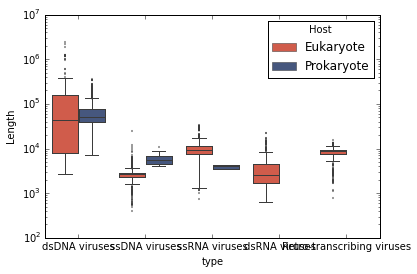

In [11]:
#Plot genome Lenghts
defVir = aux2[(aux2["type"]=="dsDNA viruses")|(aux2["type"]=="ssDNA viruses")|(aux2["type"]=="dsRNA viruses")|(aux2["type"]=="ssRNA viruses")|(aux2["type"]=="Retro-transcribing viruses")]
ax = sns.boxplot(x="type",y="Length",hue="Host",data=defVir,fliersize=1,palette=["#e64b35","#3c5388"])
ax.set(yscale="log")
ax.figure.savefig("lengthVsType.boxplot.pdf")

In [18]:
defVir[["type","Length","Host"]].to_csv("defVir.csv",header=True,index=False,sep='\t')

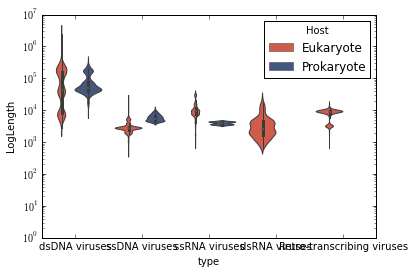

In [35]:
#Plot genome lengths
defVir = aux2[(aux2["type"]=="dsDNA viruses")|(aux2["type"]=="ssDNA viruses")|(aux2["type"]=="dsRNA viruses")|(aux2["type"]=="ssRNA viruses")|(aux2["type"]=="Retro-transcribing viruses")].copy()
    #transform data to log scale
defVir["LogLength"] = np.log10(defVir["Length"])
ax = sns.violinplot(x="type",y="LogLength",hue="Host",data=defVir,palette=["#e64b35","#3c5388"])
    #Change tick labels. Make them as in log scale
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
ax.yaxis.set_ticks([np.log10(x) for p in range(0,7) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
#save plot
ax.figure.savefig("lengthVsType.violinplot.pdf")

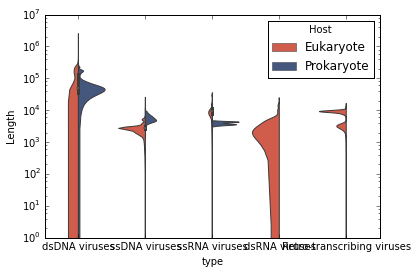

In [32]:
#Plot genome Lengths
defVir = aux2[(aux2["type"]=="dsDNA viruses")|(aux2["type"]=="ssDNA viruses")|(aux2["type"]=="dsRNA viruses")|(aux2["type"]=="ssRNA viruses")|(aux2["type"]=="Retro-transcribing viruses")]
ax = sns.violinplot(x="type",y="Length",hue="Host",data=defVir,split=True,palette=["#e64b35","#3c5388"])
ax.set(yscale="log")
ax.figure.savefig("lengthVsType.violinplot2.pdf")

In [11]:
#aux2.groupby(["type","Host"]).count()
#
#	|	|Number of Genomes
#dsDNA viruses|	Eukaryote	2002
#                Prokaryote	1766
#dsRNA viruses	Eukaryote	443
#ssDNA viruses	Eukaryote	1606
#                Prokaryote	125
#ssRNA viruses	Eukaryote	4720
#                Prokaryote	26


In [36]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import mannwhitneyu
from scipy.stats import linregress
import numpy as np

In [37]:
print normaltest(aux2[(aux2["type"]=="dsDNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
print normaltest(aux2[(aux2["type"]=="dsDNA viruses")&(aux2["Host"]=="Prokaryote")]["Length"])

print normaltest(aux2[(aux2["type"]=="ssDNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
print normaltest(aux2[(aux2["type"]=="ssDNA viruses")&(aux2["Host"]=="Prokaryote")]["Length"])

print normaltest(aux2[(aux2["type"]=="ssRNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
print normaltest(aux2[(aux2["type"]=="ssRNA viruses")&(aux2["Host"]=="Prokaryote")]["Length"])

print normaltest(aux2[(aux2["type"]=="dsRNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])

print normaltest(aux2[(aux2["type"]=="Retro-transcribing viruses")&(aux2["Host"]=="Eukaryote")]["Length"])

NormaltestResult(statistic=2645.8369014379323, pvalue=0.0)
NormaltestResult(statistic=517.28354264296581, pvalue=4.7130920877478258e-113)
NormaltestResult(statistic=1794.0967469600012, pvalue=0.0)
NormaltestResult(statistic=16.429690397768066, pvalue=0.00027060639796439983)
NormaltestResult(statistic=1723.5895886248484, pvalue=0.0)
NormaltestResult(statistic=58.260705166072199, pvalue=2.2327937987337623e-13)
NormaltestResult(statistic=257.96684841375793, pvalue=9.6207872281893833e-57)
NormaltestResult(statistic=305.65245477894757, pvalue=4.2502331537066514e-67)


In [38]:
print shapiro(aux2[(aux2["type"]=="dsDNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
print normaltest(aux2[(aux2["type"]=="dsDNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
print anderson(aux2[(aux2["type"]=="dsDNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])

(0.5174371004104614, 0.0)
NormaltestResult(statistic=2645.8369014379323, pvalue=0.0)
AndersonResult(statistic=inf, critical_values=array([ 0.575,  0.655,  0.785,  0.916,  1.09 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [39]:
dsDNAE = np.array(aux2[(aux2["type"]=="dsDNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
dsDNAP = np.array(aux2[(aux2["type"]=="dsDNA viruses")&(aux2["Host"]=="Prokaryote")]["Length"])

print mannwhitneyu(dsDNAP,dsDNAE,alternative="greater")

MannwhitneyuResult(statistic=1912320.0, pvalue=7.1927745554833053e-06)


In [40]:
ssDNAE = np.array(aux2[(aux2["type"]=="ssDNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
ssDNAP = np.array(aux2[(aux2["type"]=="ssDNA viruses")&(aux2["Host"]=="Prokaryote")]["Length"])

print mannwhitneyu(ssDNAP,ssDNAE,alternative="two-sided")
print mannwhitneyu(ssDNAP,ssDNAE,alternative="less")
print mannwhitneyu(ssDNAP,ssDNAE,alternative="greater")

MannwhitneyuResult(statistic=191245.0, pvalue=6.1658009656057139e-64)
MannwhitneyuResult(statistic=191245.0, pvalue=1.0)
MannwhitneyuResult(statistic=191245.0, pvalue=3.0829004828028569e-64)


In [41]:
ssRNAE = np.array(aux2[(aux2["type"]=="ssRNA viruses")&(aux2["Host"]=="Eukaryote")]["Length"])
ssRNAP = np.array(aux2[(aux2["type"]=="ssRNA viruses")&(aux2["Host"]=="Prokaryote")]["Length"])

print mannwhitneyu(ssRNAP,ssRNAE,alternative="two-sided")
print mannwhitneyu(ssRNAP,ssRNAE,alternative="less")
print mannwhitneyu(ssRNAP,ssRNAE,alternative="greater")

MannwhitneyuResult(statistic=5824.0, pvalue=1.5781251515347371e-15)
MannwhitneyuResult(statistic=5824.0, pvalue=7.8906257576736856e-16)
MannwhitneyuResult(statistic=5824.0, pvalue=0.99999999999999922)


In [42]:
DNA = np.array(aux2[(aux2["type"]=="ssDNA viruses")|(aux2["type"]=="dsDNA viruses")]["Length"])
RNA = np.array(aux2[(aux2["type"]=="ssRNA viruses")|(aux2["type"]=="dsRNA viruses")]["Length"])

print mannwhitneyu(DNA,RNA,alternative="two-sided")
print mannwhitneyu(DNA,RNA,alternative="less")
print mannwhitneyu(DNA,RNA,alternative="greater")

MannwhitneyuResult(statistic=18215062.0, pvalue=2.2395334915075105e-135)
MannwhitneyuResult(statistic=18215062.0, pvalue=1.0)
MannwhitneyuResult(statistic=18215062.0, pvalue=1.1197667457537553e-135)


In [43]:
#This comparison between viruses and phages does not make sense as there are 12,026 genomes of viruses 
# and only 1,973 genomes of phages. 
E = np.array(aux2[(aux2["Host"]=="Eukaryote")]["Length"])
P = np.array(aux2[(aux2["Host"]=="Prokaryote")]["Length"])

print mannwhitneyu(E,P,alternative="two-sided")
print mannwhitneyu(E,P,alternative="less")
print mannwhitneyu(E,P,alternative="greater")

MannwhitneyuResult(statistic=3051731.0, pvalue=0.0)
MannwhitneyuResult(statistic=3051731.0, pvalue=0.0)
MannwhitneyuResult(statistic=3051731.0, pvalue=1.0)


In [44]:
#Plot gen density
#As some Eukaryotic viruses have longer genomes than phages, it is better to plot them separately

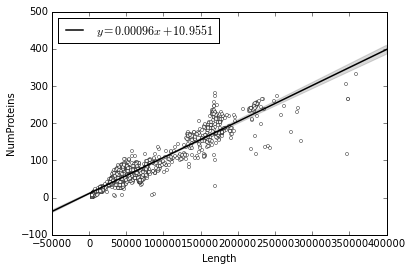

In [45]:
#Gen density phages
phages = defVir[defVir["Host"]=="Prokaryote"]
m,b,r,p,std = linregress(phages["Length"],phages["NumProteins"]) #this line save the values of a linear regression
ax = sns.regplot(data=phages,x="Length",y="NumProteins",
                     scatter_kws={"color":"white","edgecolor":"black","s":10},
                     line_kws={"color":"black",'label':'$y=%3.7sx+%3.7s$'%(m,b)})
ax.legend(loc='upper left')        
ax.figure.savefig("geneDensityPhages.pdf")

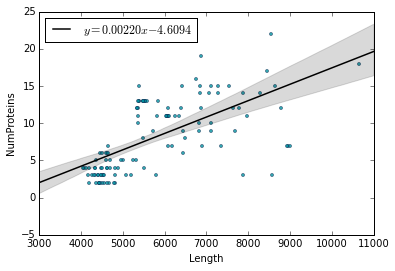

In [104]:
#Gen density phages
phages = defVir[defVir["Host"]=="Prokaryote"]
phagesSSdna = phages[phages["type"]=="ssDNA viruses"]
phagesDSdna = phages[phages["type"]=="dsDNA viruses"]
phagesSSrna = phages[phages["type"]=="ssRNA viruses"]
m,b,r,p,std = linregress(phagesSSdna["Length"],phagesSSdna["NumProteins"]) #this line save the values of a linear regression
ax = sns.regplot(data=phagesSSdna,x="Length",y="NumProteins",
                     scatter_kws={"color":"#00909e","edgecolor":"#142850","s":10},
                     line_kws={"color":"black",'label':'$y=%3.7sx%3.7s$'%(m,b)})
ax.legend(loc='upper left')
ax.figure.savefig("geneDensityPhages.ssDNA.pdf")

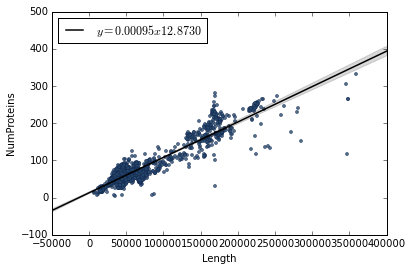

In [105]:
m,b,r,p,std = linregress(phagesDSdna["Length"],phagesDSdna["NumProteins"]) #this line save the values of a linear regression
ax = sns.regplot(data=phagesDSdna,x="Length",y="NumProteins",
                     scatter_kws={"color":"#27496d","edgecolor":"#142850","s":10},
                     line_kws={"color":"black",'label':'$y=%3.7sx%3.7s$'%(m,b)})
ax.legend(loc='upper left')
ax.figure.savefig("geneDensityPhages.dsDNA.pdf")

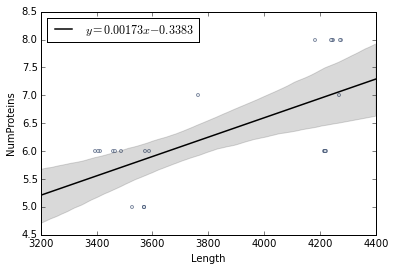

In [106]:
m,b,r,p,std = linregress(phagesSSrna["Length"],phagesSSrna["NumProteins"]) #this line save the values of a linear regression
ax = sns.regplot(data=phagesSSrna,x="Length",y="NumProteins",
                     scatter_kws={"color":"#dae1e7","edgecolor":"#142850","s":10},
                     line_kws={"color":"black",'label':'$y=%3.7sx%3.7s$'%(m,b)})
ax.legend(loc='upper left')
ax.figure.savefig("geneDensityPhages.ssRNA.pdf")

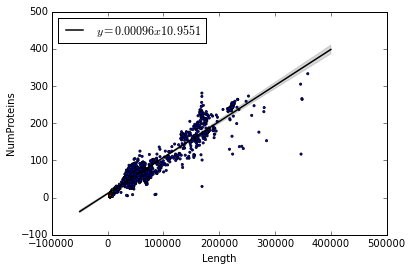

In [137]:
#Gen density phages
phages = defVir[defVir["Host"]=="Prokaryote"]
m,b,r,p,std = linregress(phages["Length"],phages["NumProteins"]) #this line save the values of a linear regression
ax = sns.regplot(data=phages,x="Length",y="NumProteins",scatter=True,
                 scatter_kws={"color":"#27496d","edgecolor":"#142850","s":0.1},
                 line_kws={"color":"black",'label':'$y=%3.7sx%3.7s$'%(m,b)})
ax = sns.scatterplot(data=phages,x="Length",y="NumProteins",hue="type",legend=False,
                     s=5,alpha=1,edgecolor=None)
#ax = sns.lineplot(x=range(-50000,400000,50000), y=[m*x+b for x in range(-50000,400000,50000)])
#ax._legend.remove()
                     #scatter_kws={"color":"#3c5388","edgecolor":"black","s":10},
                     #line_kws={"color":"black",'label':'$y=%3.7sx+%3.7s$'%(m,b)})
ax.legend(loc='upper left')        
#ax.figure.savefig("geneDensityPhages.hued2.pdf")

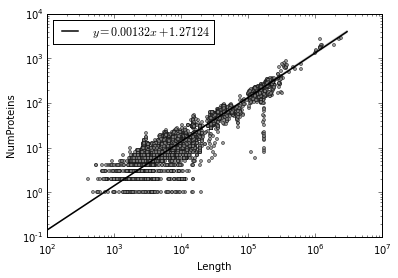

In [109]:
#Gen density viruses
viruses = defVir[defVir["Host"]=="Eukaryote"]
m,b,r,p,std = linregress(viruses["Length"],viruses["NumProteins"]) #this line save the values of a linear regression
ax = sns.regplot(data=viruses,x="Length",y="NumProteins",
                 scatter_kws={"color":"grey","edgecolor":"black","s":10},
                 line_kws={"color":"black",'label':'$y=%3.7sx+%3.7s$'%(m,b)})
ax.legend(loc='upper left') 
ax.set(yscale="log",xscale="log")
ax.figure.savefig("geneDensityViruses.pdf")

[None, None]

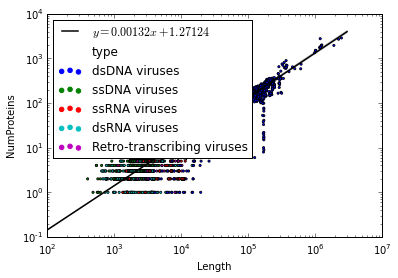

In [136]:
#Gen density viruses
viruses = defVir[defVir["Host"]=="Eukaryote"]
m,b,r,p,std = linregress(viruses["Length"],viruses["NumProteins"]) #this line save the values of a linear regression
ax = sns.regplot(data=viruses,x="Length",y="NumProteins",
                 scatter_kws={"color":"grey","edgecolor":"black","s":0.1},
                 line_kws={"color":"black",'label':'$y=%3.7sx+%3.7s$'%(m,b)})
ax = sns.scatterplot(data=viruses,x="Length",y="NumProteins",hue="type",
                     s=5,alpha=1,edgecolor=None)
ax.legend(loc='upper left')
#ax.get_legend().remove()
ax.set(yscale="log",xscale="log")
#ax.figure.savefig("geneDensityViruses.hueed2.pdf")
#blue:dsDNA | green:ssDNA | red:ssRNA | lightBlue: dsRNA | purple: rt-viruses

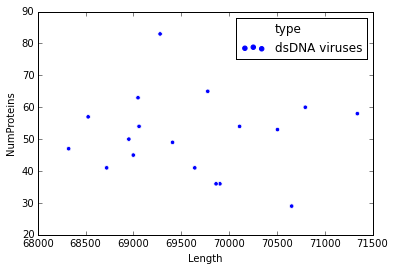

In [129]:
test = viruses[(viruses["Length"]>68000)&(viruses["Length"]<72000)]
ax = sns.scatterplot(data=test,x="Length",y="NumProteins",hue="type")
#ax.set(yscale="log",xscale="log")

In [134]:
viruses[(viruses["Length"]>171000)&(viruses["Length"]<172000)&(viruses["NumProteins"]<100)].sort_values(by="NumProteins")

,Accession,Species,Genus,Subfamily,Family,Order,type,NN,Length,NumProteins,Virus,Length (bp),C/L,GI,Representative,RepClusters,RepSL,Host
3799,AB850652,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171733,9,"Human herpesvirus 4 DNA, complete genome, str...",171733,circular,747017415,True,NaN,NaN,Eukaryote
7595,AB850659,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171344,15,"Human herpesvirus 4 DNA, complete genome, str...",171344,circular,747017578,True,NaN,NaN,Eukaryote
9970,AB850656,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171609,16,"Human herpesvirus 4 DNA, complete genome, str...",171609,circular,747017529,True,NaN,NaN,Eukaryote
4130,AB850655,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171548,17,"Human herpesvirus 4 DNA, complete genome, str...",171548,circular,747017513,True,NaN,NaN,Eukaryote
9867,AB850658,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171394,18,"Human herpesvirus 4 DNA, complete genome, str...",171394,circular,747017565,True,NaN,NaN,Eukaryote
4891,AB850653,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171054,20,"Human herpesvirus 4 DNA, complete genome, str...",171054,circular,747017423,True,NaN,NaN,Eukaryote
3645,AB850650,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171440,22,"Human herpesvirus 4 DNA, complete genome, str...",171440,circular,747017362,True,NaN,NaN,Eukaryote
1935,AB850648,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171627,41,"Human herpesvirus 4 DNA, complete genome, str...",171627,circular,747017309,True,NaN,NaN,Eukaryote
1469,AB850651,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171518,52,"Human herpesvirus 4 DNA, complete genome, str...",171518,circular,747017380,True,NaN,NaN,Eukaryote
5322,AB850644,Human herpesvirus 4,Lymphocryptovirus,Gammaherpesvirinae,Herpesviridae,Herpesvirales,dsDNA viruses,no RNA stage,171751,66,"Human herpesvirus 4 DNA, complete genome, str...",171751,circular,747017196,True,NaN,NaN,Eukaryote


In [130]:
viruses[(viruses["Length"]>68000)&(viruses["Length"]<72000)&(viruses["NumProteins"]<40)].sort_values(by="NumProteins")

,Accession,Species,Genus,Subfamily,Family,Order,type,NN,Length,NumProteins,Virus,Length (bp),C/L,GI,Representative,RepClusters,RepSL,Host
6892,NC_008195,Mycobacterium phage Cooper,Pgonelikevirus,NaN,Siphoviridae,Caudovirales,dsDNA viruses,no RNA stage,70654,29,"Mycobacterium phage Cooper, complete genome",70654,linear,109392353,True,True,NaN,Eukaryote
3610,NC_011044,Mycobacterium phage Nigel,Pgonelikevirus,NaN,Siphoviridae,Caudovirales,dsDNA viruses,no RNA stage,69904,36,"Mycobacterium phage Nigel, complete genome",69904,linear,194100514,True,True,NaN,Eukaryote
7286,NC_023701,Mycobacterium phage Acadian,Pgonelikevirus,NaN,Siphoviridae,Caudovirales,dsDNA viruses,no RNA stage,69864,36,"Mycobacterium phage Acadian, complete genome",69864,linear,593775497,True,True,NaN,Eukaryote
